### import data

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
some_x,some_y=X[5],y[5]

In [6]:
y[5]

'2'

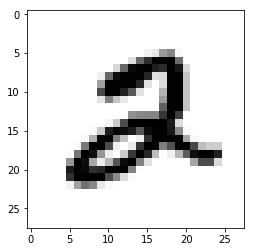

In [7]:
plt.imshow(some_x.reshape(28,28), cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

### Shift picture

In [8]:
from scipy.ndimage.interpolation import shift

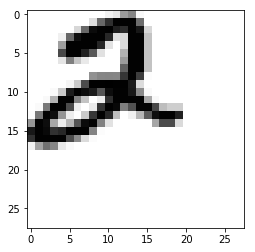

In [9]:
imgag_shift=shift(some_x.reshape(28,28), [-5, -5], cval=0)
plt.imshow(imgag_shift, cmap = matplotlib.cm.binary, interpolation="nearest")

In [10]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_reshape=[num.reshape(28,28) for num in X]

In [12]:
X_right_1=np.squeeze([shift(num,[0,1]).reshape(1,-1) for num in X_reshape]) # right
X_left_1=np.squeeze([shift(num,[0,-1]).reshape(1,-1) for num in X_reshape]) # left
X_up_1=np.squeeze([shift(num,[-1,0]).reshape(1,-1) for num in X_reshape]) # up
X_down_1=np.squeeze([shift(num,[1,0]).reshape(1,-1) for num in X_reshape]) # down

np.squeeze reduce the demension

### Reconstruct the data

In [13]:
X_all=np.append(X,np.array(X_left_1),axis=0)
X_all=np.append(X_all,np.array(X_right_1),axis=0)
X_all=np.append(X_all,np.array(X_up_1),axis=0)
X_all=np.append(X_all,np.array(X_down_1),axis=0)

np.array make the list output by comperhension to array

In [14]:
y_all=np.append(y,y,axis=0)
y_all=np.append(y_all,y,axis=0)
y_all=np.append(y_all,y,axis=0)
y_all=np.append(y_all,y,axis=0)

In [15]:
X_all.shape

(350000, 784)

In [16]:
y_all.shape

(350000,)

### Train models get the different

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest_clf = RandomForestClassifier(random_state=42)
cross_val_score(forest_clf, X, y, cv=3,scoring="accuracy")

C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.94322077, 0.94038486, 0.94470876])

In [18]:
cross_val_score(forest_clf, X_all, y_all, cv=3,scoring="accuracy")

C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.96120649, 0.94277731, 0.92896695])